In [1]:
import joblib
import my_pipeline as mp
import helper_functions as hf
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, classification_report

%matplotlib inline

## Introduction
I trained XGBoost model in this notebook, I reused functions I wrote before to simplify the process.

In [2]:
with hf.timer('Preparing Training Data'):
    X_train, X_test, y_train, y_test = mp.prepare_for_training()

application loaded (307511, 237)
bureau loaded (305811, 135)
previous_applications loaded (338857, 153)
credit_card_balance loaded (103558, 131)
installments_payments loaded (339587, 26)
POS_CASH_balance loaded (337252, 16)
All data merged (307511, 698)
Load Full Dataset - done in 87s
Training size: (246008, 696)
Testing size: (61503, 696)
Preparing Training Data - done in 90s


In [28]:
# X_test = X_test[X_test.columns[X_train.isnull().mean() < 0.85]]
# X_train = X_train[X_train.columns[X_train.isnull().mean() < 0.85]]

In [3]:
xgb_clf = xgb.XGBClassifier(n_estimators=2000, 
                            max_depth=6, 
                            learning_rate=0.05, 
                            min_child_weight=30, 
                            colsample_bytree=0.7, 
                            colsample_bylevel = 0.6,
                            subsample=0.85, 
                            reg_alpha=0, 
                            reg_lambda=0, 
                            scale_pos_weight=1,)

In [4]:
with hf.timer('Fitting XGBoost'):
    xgb_clf, feature_importance_df, eval_dict, y_predict = \
        mp.kfold_cv(xgb_clf, 'XGBoost', X_train, y_train, X_test, 10)

Starting XGBoost. Train shape: (246008, 696), test shape: (61503, 696)
[0]	validation_0-auc:0.66835	validation_1-auc:0.66037
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.83184	validation_1-auc:0.78563
[400]	validation_0-auc:0.85731	validation_1-auc:0.78941
[600]	validation_0-auc:0.87640	validation_1-auc:0.79018
[800]	validation_0-auc:0.89246	validation_1-auc:0.79056
[1000]	validation_0-auc:0.90611	validation_1-auc:0.79026
Stopping. Best iteration:
[833]	validation_0-auc:0.89519	validation_1-auc:0.79090

[0]	validation_0-auc:0.67041	validation_1-auc:0.66328
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.83156	validation_1-auc:0.78396
[400]	validation_0-auc:0.85749	validation_1-auc:0.78847
[600]	validation_0-auc:0.8765

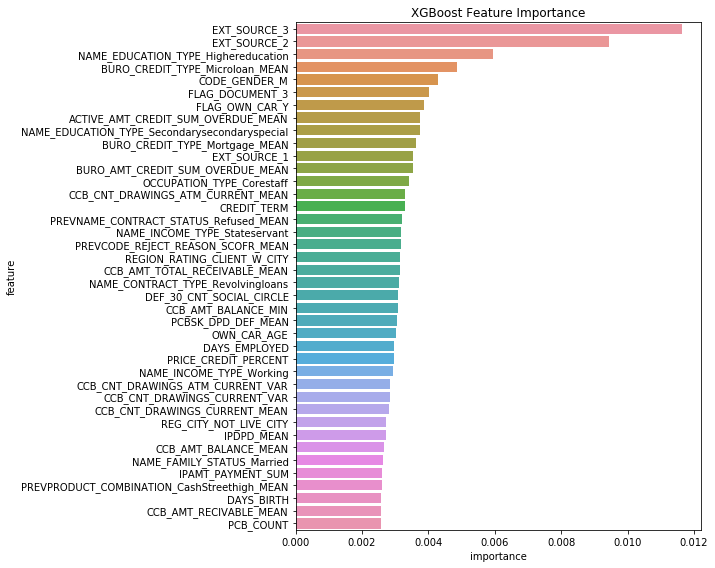

Plotting XGBoost Feature Importance - done in 0s


In [5]:
with hf.timer('Plotting XGBoost Feature Importance'):
    mp.plot_importances(feature_importance_df, 'XGBoost Feature Importance')

In [36]:
eval_hist = xgb_clf.evals_result()
train_scores = eval_hist['validation_0']['auc']
valid_scores = eval_hist['validation_1']['auc']

In [41]:
def display_learning_curve(train_scores, valid_scores, title):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes = range(len(train_scores))
    # Plot learning curve
    plt.grid()
    plt.plot(train_sizes, train_scores, '-', color="r",
                 label="Training ROC")
    plt.plot(train_sizes, valid_scores, '-', color="g",
                 label="Cross-validation ROC")
    plt.legend(loc="best")
    
    print(f'Validation ROC: {np.max(valid_scores)}')
    plt.show()

Validation ROC: 0.795622


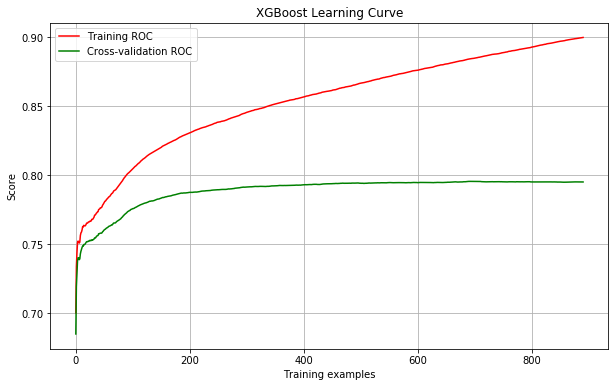

In [42]:
display_learning_curve(train_scores, valid_scores, 'XGBoost Learning Curve')